In [1]:
! python3 -m pip install -q -r requirements.txt --no-warn-script-location

In [2]:
from sklearn.cluster import KMeans
from IPython.display import display, HTML
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET
import pandas as pd
import hashlib
import time
import datetime
import plotly.graph_objs as go
from dateutil.parser import parse as parse_time
%matplotlib inline
#%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [3]:
df = pd.read_csv("data/sample/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

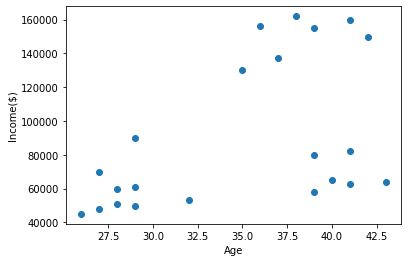

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [6]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [7]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

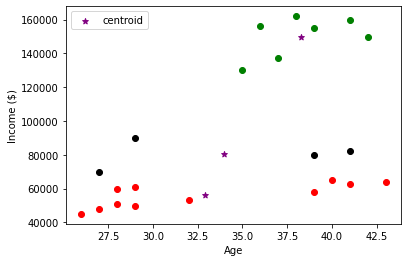

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [9]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [10]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [12]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [13]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

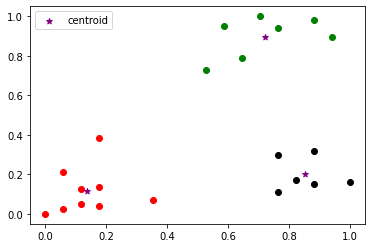

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

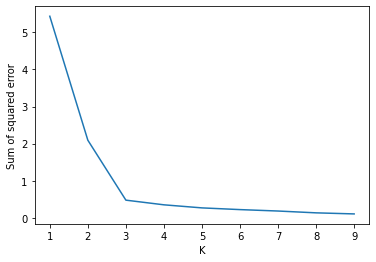

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [17]:
mytree = ET.parse('./data/xml/boot.xml')

myroot = mytree.getroot()
events = []
for event in myroot:
    event_data = {}
    for x in event:
        for y in x:
            for prop in enumerate(y.attrib):
                if prop[1] == 'Name':
                    event_data[y.attrib[prop[1]]] = y.text
                else:
                    event_data[prop[1]] = y.attrib[prop[1]]
    events.append(event_data)

In [18]:
lookup_tables = {
    'convert_str': {}
}
def convert_time(timestamp):
    if timestamp == False:
            return False
    utc = parse_time(timestamp, fuzzy=True).timestamp()
    #print(f"{timestamp}=>{utc}")
    return utc

def convert_hex(hexstr):
    if hexstr == False:
            return False
    return int(hexstr, 16)

def convert_int(intstr):
    if intstr == False:
            return 0
    return int(intstr, 10)

def convert_str(s):
    s = str(s)
    if s == False:
            return False
    result = int(hashlib.sha256(s.encode('utf-8')).hexdigest(), 16) % 10**16
    lookup_tables['convert_str'][result] = s
    return result

def convert_bool(val):
    if val == True:
        return 1
    elif val == False:
        return 0
    else:
        return val

def convert_zero(val):
    if val == '0':
        return 0
    else:
        return val

In [33]:
df = pd.DataFrame(events[0:1000])
df.fillna(value=0, inplace=True)
df = df[df['FileName'] != 0]
df.sort_index(axis=1, inplace=True)

display(HTML(df.to_html(max_rows=4, float_format='{:10.4f}'.format)))

# Conversions

df['SystemTime_Data'] = df['SystemTime'].apply(convert_time)

df['FileName_Data'] = df['FileName'].apply(convert_str)
df.head()
df['ImageChecksum_Data'] = df['ImageChecksum'].apply(convert_str)
df['Guid_Data'] = df['Guid'].apply(convert_str)
df['LogFileNameString_Data'] = df['LogFileNameString'].apply(convert_str)
df['SessionNameString_Data'] = df['SessionNameString'].apply(convert_str)

df['TransferSize'] = df['TransferSize'].apply(convert_int)
#df['ImageChecksum'] = df['ImageChecksum'].apply(convert_int)

df['ImageBase_Data'] = df['ImageBase'].apply(convert_hex)
df['StackBase_Data'] = df['StackBase'].apply(convert_hex)
df['ImageSize_Data'] = df['ImageSize'].apply(convert_hex)
df['Win32StartAddr_Data'] = df['Win32StartAddr'].apply(convert_hex)
df['DefaultBase_Data'] = df['DefaultBase'].apply(convert_hex)
df['LogFileMode_Data'] = df['LogFileMode'].apply(convert_hex)
df['LogFileName_Data'] = df['LogFileName'].apply(convert_hex)
df['LoggerName_Data'] = df['LoggerName'].apply(convert_hex)
df['GroupMask1_Data'] = df['GroupMask1'].apply(convert_hex)
df['GroupMask2_Data'] = df['GroupMask2'].apply(convert_hex)
df['GroupMask3_Data'] = df['GroupMask3'].apply(convert_hex)
df['GroupMask4_Data'] = df['GroupMask4'].apply(convert_hex)
df['GroupMask5_Data'] = df['GroupMask5'].apply(convert_hex)
df['GroupMask6_Data'] = df['GroupMask6'].apply(convert_hex)
df['GroupMask7_Data'] = df['GroupMask7'].apply(convert_hex)
df['GroupMask8_Data'] = df['GroupMask8'].apply(convert_hex)

#for column in df:
#    df[column] = df[column].apply(convert_bool)
#    df[column] = df[column].apply(convert_zero)

display(HTML(df.to_html(max_rows=40, float_format='{:10.4f}'.format)))    

,ActivityID,Affinity,ApplicationId,BasePriority,BootTime,BufferSize,BuffersLost,BuffersWritten,ByteOffset,CPUSpeed,CommandLine,DefaultBase,DirectoryTableBase,DiskNumber,EndTime,EventVersion,EventsLost,ExitStatus,FileName,FileObject,Flags,GroupMask1,GroupMask2,GroupMask3,GroupMask4,GroupMask5,GroupMask6,GroupMask7,GroupMask8,Guid,HighResResponseTime,ImageBase,ImageChecksum,ImageFileName,ImageSize,IoPriority,Irp,IrpFlags,IssuingThreadId,KernelEventVersion,KernelTime,LogFileMode,LogFileName,LogFileNameString,LoggerName,MaxFileSize,NumberOfProcessors,PackageFullName,PagePriority,ParentId,PartitionId,PartitionType,PerfFreq,PointerSize,ProcessID,ProcessId,ProcessorID,ProviderVersion,QpcOffsetFromRoot,Reserved,Reserved0,Reserved1,Reserved2,Reserved3,Reserved4,ReservedFlags,SessionId,SessionNameString,SignatureLevel,SignatureType,StackBase,StackLimit,StartBuffers,StartTime,SubProcessTag,SystemTime,TThreadId,TebBase,ThreadFlags,ThreadID,TimeDateStamp,TimerResolution,TransferSize,Type,UniqueProcessKey,UserSID,UserStackBase,UserStackLimit,UserTime,Version,Win32StartAddr,win:ExtraPayload
94,{00000000-0000-0000-0000-000000000000},0,0.0000,0,0,0,0,0,0,0,0.0000,0x0,0,0,0,0,0,0,\SystemRoot\system32\ntoskrnl.exe,0,0,0,0,0,0,0,0,0,0,{9e814aad-3204-11d2-9a82-006008a86939},0,0xFFFFF80078200000,11781483,0,0x1047000,0,0,0,0,0,60,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-03-15T02:38:19.524488400-04:00,0,0,0,32,1355116453,0,0,0,0,0,0,0,0,0,0,0
95,{00000000-0000-0000-0000-000000000000},0,0.0000,0,0,0,0,0,0,0,0.0000,0x0,0,0,0,0,0,0,\SystemRoot\system32\hal.dll,0,0,0,0,0,0,0,0,0,0,{9e814aad-3204-11d2-9a82-006008a86939},0,0xFFFFF80074D20000,42058,0,0x6000,0,0,0,0,0,60,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-03-15T02:38:19.524488600-04:00,0,0,0,32,4000812381,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,{00000000-0000-0000-0000-000000000000},0,0.0000,0,0,0,0,0,0,0,0.0000,0x0,0,0,0,0,0,0,\SystemRoot\system32\drivers\wd\WdBoot.sys,0,0,0,0,0,0,0,0,0,0,{9e814aad-3204-11d2-9a82-006008a86939},0,0xFFFFF8007AF40000,57364,0,0x10000,0,0,0,0,0,2280,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,4,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-03-15T02:38:21.162510400-04:00,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0
774,{00000000-0000-0000-0000-000000000000},0,0.0000,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,0,\Device\HarddiskVolume4\$Extend\$UsnJrnl:$J,0xFFFF8607E82EE980,0,0,0,0,0,0,0,0,0,{9e814aad-3204-11d2-9a82-006008a86939},0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,4294967295,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022-03-15T02:38:21.427602400-04:00,0,0,0,4294967295,0,0,0,0,0,0,0,0,0,0,0,0


,ActivityID,Affinity,ApplicationId,BasePriority,BootTime,BufferSize,BuffersLost,BuffersWritten,ByteOffset,CPUSpeed,CommandLine,DefaultBase,DirectoryTableBase,DiskNumber,EndTime,EventVersion,EventsLost,ExitStatus,FileName,FileObject,Flags,GroupMask1,GroupMask2,GroupMask3,GroupMask4,GroupMask5,GroupMask6,GroupMask7,GroupMask8,Guid,HighResResponseTime,ImageBase,ImageChecksum,ImageFileName,ImageSize,IoPriority,Irp,IrpFlags,IssuingThreadId,KernelEventVersion,KernelTime,LogFileMode,LogFileName,LogFileNameString,LoggerName,MaxFileSize,NumberOfProcessors,PackageFullName,PagePriority,ParentId,PartitionId,PartitionType,PerfFreq,PointerSize,ProcessID,ProcessId,ProcessorID,ProviderVersion,QpcOffsetFromRoot,Reserved,Reserved0,Reserved1,Reserved2,Reserved3,Reserved4,ReservedFlags,SessionId,SessionNameString,SignatureLevel,SignatureType,StackBase,StackLimit,StartBuffers,StartTime,SubProcessTag,SystemTime,TThreadId,TebBase,ThreadFlags,ThreadID,TimeDateStamp,TimerResolution,TransferSize,Type,UniqueProcessKey,UserSID,UserStackBase,UserStackLimit,UserTime,Version,Win32StartAddr,win:ExtraPayload,SystemTime_Data,FileName_Data,ImageChecksum_Data,Guid_Data,LogFileNameString_Data,SessionNameString_Data,ImageBase_Data,StackBase_Data,ImageSize_Data,Win32StartAddr_Data,DefaultBase_Data,LogFileMode_Data,LogFileName_Data,LoggerName_Data,GroupMask1_Data,GroupMask2_Data,GroupMask3_Data,GroupMask4_Data,GroupMask5_Data,GroupMask6_Data,GroupMask7_Data,GroupMask8_Data
94,{00000000-0000-0000-0000-000000000000},0,0.0000,0,0,0,0,0,0,0,0.0000,0x0,0,0,0,0,0,0,\SystemRoot\system32\ntoskrnl.exe,0,0,0,0,0,0,0,0,0,0,{9e814aad-3204-11d2-9a82-006008a86939},0,0xFFFFF80078200000,11781483,0,0x1047000,0,0,0,0,0,60,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-03-15T02:38:19.524488400-04:00,0,0,0,32,1355116453,0,0,0,0,0,0,0,0,0,0,0,1647326299.5245,2197173372750839,2334305907254366,2595840278017406,6338137402595305,6338137402595305,18446735279631892480,False,17068032,False,0,False,False,False,False,False,False,False,False,False,False,False
95,{00000000-0000-0000-0000-000000000000},0,0.0000,0,0,0,0,0,0,0,0.0000,0x0,0,0,0,0,0,0,\SystemRoot\system32\hal.dll,0,0,0,0,0,0,0,0,0,0,{9e814aad-3204-11d2-9a82-006008a86939},0,0xFFFFF80074D20000,42058,0,0x6000,0,0,0,0,0,60,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-03-15T02:38:19.524488600-04:00,0,0,0,32,4000812381,0,0,0,0,0,0,0,0,0,0,0,1647326299.5245,5966634109289989,2233900482836248,2595840278017406,6338137402595305,6338137402595305,18446735279576449024,False,24576,False,0,False,False,False,False,False,False,False,False,False,False,False
96,{00000000-0000-0000-0000-000000000000},0,0.0000,0,0,0,0,0,0,0,0.0000,0x0,0,0,0,0,0,0,\SystemRoot\system32\kd.dll,0,0,0,0,0,0,0,0,0,0,{9e814aad-3204-11d2-9a82-006008a86939},0,0xFFFFF80074D30000,56817,0,0xB000,0,0,0,0,0,60,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-03-15T02:38:19.524488800-04:00,0,0,0,32,2122049460,0,0,0,0,0,0,0,0,0,0,0,1647326299.5245,4455351309561390,8410691133903469,2595840278017406,6338137402595305,6338137402595305,18446735279576514560,False,45056,False,0,False,False,False,False,False,False,False,False,False,False,False
97,{00000000-0000-0000-0000-000000000000},0,0.0000,0,0,0,0,0,0,0,0.0000,0x0,0,0,0,0,0,0,\SystemRoot\System32\drivers\CLFS.SYS,0,0,0,0,0,0,0,0,0,0,{9e814aad-3204-11d2-9a82-006008a86939},0,0xFFFFF80074D70000,491537,0,0x6C000,0,0,0,0,0,60,0,0,0,0,0,0,0.0000,0,0,0,0,0,0,4,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2022-03-15T02:38:19.524489700-04:00,0,0,0,32,2821778966,0,0,0,0,0,0,0,0,0,0,0,1647326299.5245,2109517691522878,8444820052840668,2595840278017406,6338137402595305,6338137402595305,18446735279576776704,False,442368,False,0,False,False,False,False,False,False,False,False,False,False,False
98,{00000000-0000-0000-0000-000000000000},0,0.0000,0,0,0,0,0,0,0,0.0000,0x0,0,0,0,0,0,0,\SystemRoot\System32\drivers\tm.sys,0,0,0,0,0,0,0,0,0,0,{9e814aad-3204-11d2-9a82-006008a86939

In [35]:
useful_keys = ['FileName', 'FileName_Data', 'UserSID_Data', 'ImageSize_Data', 'ImageChecksum_Data']
dfs = []
for i in range(100):
    dfs.append(df.filter(items=useful_keys))
analysis_df = pd.concat(dfs, ignore_index=True, copy=True)
analysis_df.head()

,FileName,FileName_Data,ImageSize_Data,ImageChecksum_Data
0,\SystemRoot\system32\ntoskrnl.exe,2197173372750839,17068032,2334305907254366
1,\SystemRoot\system32\hal.dll,5966634109289989,24576,2233900482836248
2,\SystemRoot\system32\kd.dll,4455351309561390,45056,8410691133903469
3,\SystemRoot\System32\drivers\CLFS.SYS,2109517691522878,442368,8444820052840668
4,\SystemRoot\System32\drivers\tm.sys,5358260095996352,163840,76033576148148


# Simulate anomalous data

In [36]:
anomoly = pd.Series(['innocent_calculator.exe', convert_str('innocent_calculator.exe'), 0, 22000, convert_str('123456789')], index=["FileName", "FileName_Data", "UserSID_Data", "ImageSize_Data", "ImageChecksum_Data"])
analysis_df = pd.concat([analysis_df, anomoly.to_frame().T], ignore_index=True)
display(HTML(analysis_df.to_html(max_rows=4, float_format='{:10.4f}'.format)))

,FileName,FileName_Data,ImageSize_Data,ImageChecksum_Data,UserSID_Data
0,\SystemRoot\system32\ntoskrnl.exe,2197173372750839,17068032,2334305907254366,NaN
1,\SystemRoot\system32\hal.dll,5966634109289989,24576,2233900482836248,NaN
...,...,...,...,...,...
7499,\Device\HarddiskVolume4\$Extend\$UsnJrnl:$J,9104619253376241,False,6338137402595305,NaN
7500,innocent_calculator.exe,6817023204572264,22000,1958380719944229,0


In [37]:
names = {}
db = {}
count_max = 100

for fname in analysis_df['FileName_Data']:
    reverted_val = lookup_tables['convert_str'][fname]
    fname = str(fname)
    names[reverted_val] = True
    if fname in db:
        if db[fname] < count_max:
            db[fname] += 1
    else:
        db[fname] = 0


count_db = {}
for checksum in analysis_df['ImageChecksum_Data']:
    checksum = str(checksum)
    if checksum in count_db:
        if count_db[checksum] < count_max:
            count_db[checksum] += 1
    else:
        count_db[checksum] = 1

print(f"count_db: {count_db}")

analysis_df['ImageChecksum_Count_Data'] = 0
analysis_df['FileName_Count_Data'] = 0

#analysis_df['ImageChecksum_Count'] = count_db[str(analysis_df['ImageChecksum'])]

checksum_col_index = analysis_df.columns.get_loc('ImageChecksum_Data')
checksum_count_col_index = analysis_df.columns.get_loc('ImageChecksum_Count_Data')
#print('test:', count_db[str(analysis_df.iat[1, checksum_count_col_index])])

for i, row in analysis_df.iterrows():
    analysis_df.iat[i, checksum_count_col_index] = count_db[str(analysis_df.iat[i, checksum_col_index])]

filename_col_index = analysis_df.columns.get_loc('FileName_Data')
filename_count_col_index = analysis_df.columns.get_loc('FileName_Count_Data')

for i, row in analysis_df.iterrows():
    analysis_df.iat[i, filename_count_col_index] = db[str(analysis_df.iat[i, filename_col_index])]
    
#print('val:', analysis_df.iat[1, checksum_count_col_index])

print('Files:')
for name in names:
    print(f"\t{name}")

count_db: {'2334305907254366': 100, '2233900482836248': 100, '8410691133903469': 100, '8444820052840668': 100, '76033576148148': 100, '6842184357529356': 100, '789811964569711': 100, '5686364468977425': 100, '3864436362834962': 100, '5687075649468471': 100, '8877131806852342': 100, '2766280888782840': 100, '6862096966905475': 100, '7545568314992641': 100, '590831122182091': 100, '7669015475331067': 100, '8167523525845403': 100, '3205087929120124': 100, '6754707937401894': 100, '3475793973580165': 100, '3396631921786418': 100, '2097686507297819': 100, '5715595024678969': 100, '4126337146707108': 100, '823569620542165': 100, '9963531350432128': 100, '6416296522484624': 100, '3139242282402417': 100, '3546548709078593': 100, '9638192411023633': 100, '6276674110026701': 100, '8328898752264124': 100, '2236584074685650': 100, '9639420360901687': 100, '2288591986414448': 100, '8918642917149079': 100, '2441329659959205': 100, '2693131648401002': 100, '406332901199158': 100, '5733946817958004': 

In [38]:
display(HTML(analysis_df.to_html(max_rows=4, float_format='{:10.4f}'.format)))

,FileName,FileName_Data,ImageSize_Data,ImageChecksum_Data,UserSID_Data,ImageChecksum_Count_Data,FileName_Count_Data
0,\SystemRoot\system32\ntoskrnl.exe,2197173372750839,17068032,2334305907254366,NaN,100,99
1,\SystemRoot\system32\hal.dll,5966634109289989,24576,2233900482836248,NaN,100,99
...,...,...,...,...,...,...,...
7499,\Device\HarddiskVolume4\$Extend\$UsnJrnl:$J,9104619253376241,False,6338137402595305,NaN,100,99
7500,innocent_calculator.exe,6817023204572264,22000,1958380719944229,0,1,0


In [39]:
scaler = MinMaxScaler()

for col in ['ImageChecksum_Count_Data', 'ImageChecksum_Data', 'FileName_Count_Data']:
    scaler.fit(analysis_df[[col]])
    analysis_df[col] = scaler.transform(analysis_df[[col]])

In [40]:
display(HTML(analysis_df.to_html(max_rows=4, float_format='{:10.4f}'.format)))

,FileName,FileName_Data,ImageSize_Data,ImageChecksum_Data,UserSID_Data,ImageChecksum_Count_Data,FileName_Count_Data
0,\SystemRoot\system32\ntoskrnl.exe,2197173372750839,17068032,0.2284,NaN,1.0000,0.9900
1,\SystemRoot\system32\hal.dll,5966634109289989,24576,0.2182,NaN,1.0000,0.9900
...,...,...,...,...,...,...,...
7499,\Device\HarddiskVolume4\$Extend\$UsnJrnl:$J,9104619253376241,False,0.6333,NaN,1.0000,0.9900
7500,innocent_calculator.exe,6817023204572264,22000,0.1904,0,0.0000,0.0000


Text(0, 0.5, 'FileName')

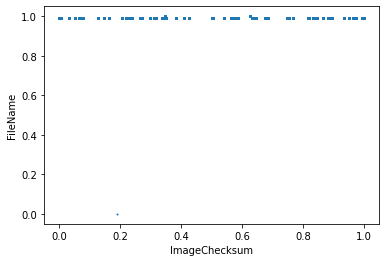

In [41]:
plt.scatter(analysis_df.ImageChecksum_Data, analysis_df.FileName_Count_Data, s=1)
plt.xlabel('ImageChecksum')
plt.ylabel('FileName')

Text(0, 0.5, 'FileName')

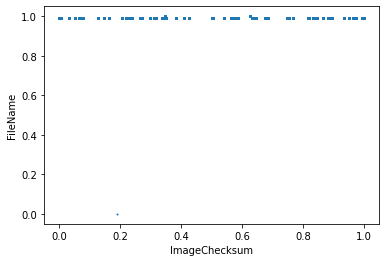

In [42]:
plt.scatter(analysis_df.ImageChecksum_Data, analysis_df.FileName_Count_Data, s=1)
plt.xlabel('ImageChecksum')
plt.ylabel('FileName')

8

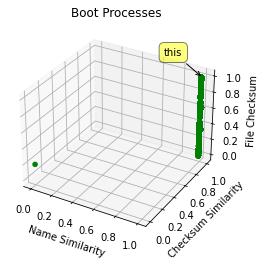

In [43]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(analysis_df.FileName_Count_Data, analysis_df.ImageChecksum_Count_Data, analysis_df.ImageChecksum_Data, color='green')

ax.set_title("Boot Processes")
ax.set_xlabel('Name Similarity')
ax.set_ylabel('Checksum Similarity')
ax.set_zlabel('File Checksum')

x2, y2, _ = proj3d.proj_transform(1,1,1, ax.get_proj())

label = plt.annotate(
    "this", 
    xy = (x2, y2), xytext = (-20, 20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

def update_position(e):
    x2, y2, _ = proj3d.proj_transform(1,1,1, ax.get_proj())
    label.xy = x2,y2
    label.update_positions(fig.canvas.renderer)
    fig.canvas.draw()
    
fig.canvas.mpl_connect('button_release_event', update_position)

In [44]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(analysis_df[['FileName_Count_Data','ImageChecksum_Count_Data']])
analysis_df['cluster']=y_predicted
analysis_df.head()

,FileName,FileName_Data,ImageSize_Data,ImageChecksum_Data,UserSID_Data,ImageChecksum_Count_Data,FileName_Count_Data,cluster
0,\SystemRoot\system32\ntoskrnl.exe,2197173372750839,17068032,0.228397,NaN,1.0,0.99,0
1,\SystemRoot\system32\hal.dll,5966634109289989,24576,0.218242,NaN,1.0,0.99,0
2,\SystemRoot\system32\kd.dll,4455351309561390,45056,0.842949,NaN,1.0,0.99,0
3,\SystemRoot\System32\drivers\CLFS.SYS,2109517691522878,442368,0.846401,NaN,1.0,0.99,0
4,\SystemRoot\System32\drivers\tm.sys,5358260095996352,163840,0.000000,NaN,1.0,0.99,0


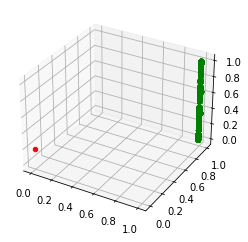

In [45]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
df1 = analysis_df[analysis_df.cluster==0]
df2 = analysis_df[analysis_df.cluster==1]
ax.scatter(df1['FileName_Count_Data'], df1['ImageChecksum_Count_Data'], df1['ImageChecksum_Data'],color='green')
ax.scatter(df2['FileName_Count_Data'], df2['ImageChecksum_Count_Data'], df2['ImageChecksum_Data'],color='red')
#ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
#ax.legend()

# Baseline: Files Executed During Boot

Axis descriptions:

- **Checksum**: Serves only to spread out the data for better visualization.
- **Filename Normality**: Shows how often file names appear in the baseline.
- **Checksum Normality**: Shows how often file contents appear in the baseline.

*Fewer matches, or values closer to zero, are more likely to be anomalous.*

***Rule of thumb:*** Green is good, red is bad.

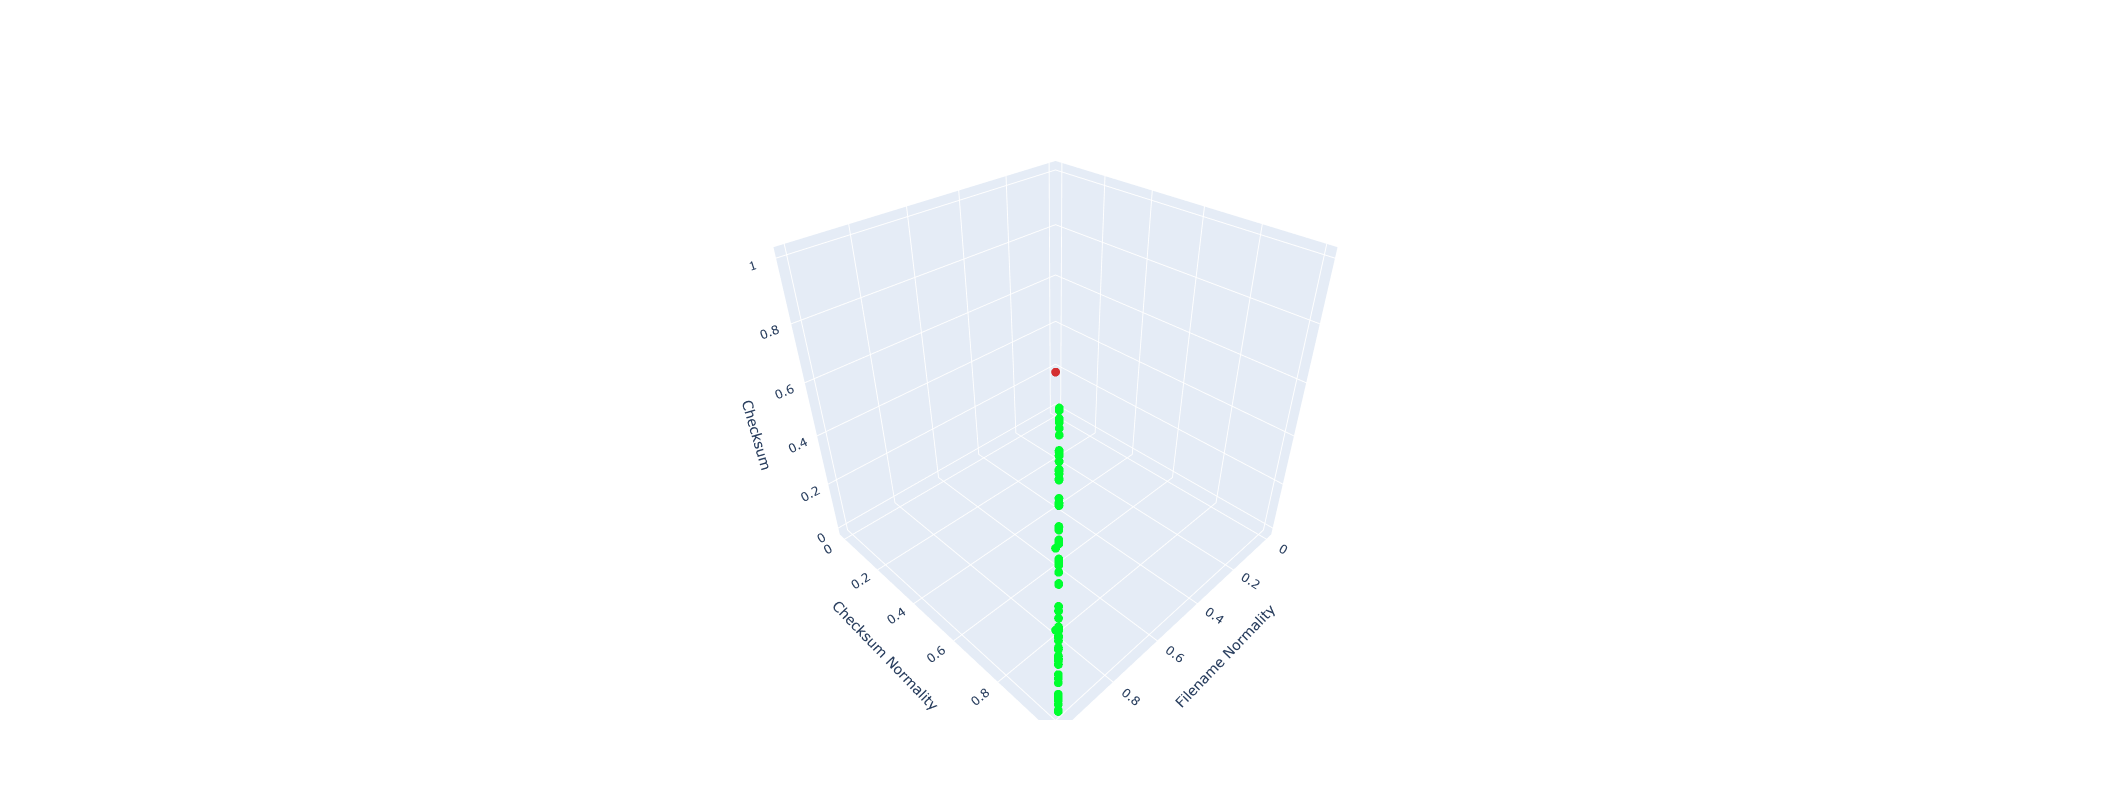

In [49]:
x = analysis_df[['FileName_Count_Data','ImageChecksum_Count_Data', 'ImageChecksum_Data']].values
Scene = dict(xaxis = dict(title = 'Filename Normality'), yaxis = dict(title = 'Checksum Normality'), zaxis = dict(title = 'Checksum'))
trace = go.Scatter3d(
                     x=x[:, 0],
                     y=x[:, 1],
                     z=x[:, 2], 
                     mode='markers', 
                     marker=dict(
                                 color = analysis_df['ImageChecksum_Count_Data'], 
                                 colorscale=['#cf0000', '#00ff2f'],   # choose a colorscale
                                 opacity = 0.8, 
                                 size = 5
                     ), 
                     hovertemplate = analysis_df.FileName.astype(str)
                    )
layout = go.Layout(margin=dict(l=0,r=0), scene = Scene, height = 800, width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()